# $\color{ForestGreen}{\text{Iris Dataset}}$

In [1]:
# Importing basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Loading isis dataset

from sklearn.datasets import load_iris

iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
# Storing iris dataset in a dataframe

iris_df = pd.DataFrame(iris.data)       # Defining dataframe boston_df 
iris_df.columns = iris.feature_names    # Defining the headers of the dataframe
iris_df['Class'] = iris.target          # Adding Price column

iris_df.sample(5)                       # Viewing the first few rows of dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
130,7.4,2.8,6.1,1.9,2
56,6.3,3.3,4.7,1.6,1
113,5.7,2.5,5.0,2.0,2
138,6.0,3.0,4.8,1.8,2
46,5.1,3.8,1.6,0.2,0


In [4]:
# Finding the sizes of the classes

print('Size of class 0:', len(iris_df[iris_df['Class']==0]))
print('Size of class 1:', len(iris_df[iris_df['Class']==1]))
print('Size of class 2:', len(iris_df[iris_df['Class']==2]))
print('Size of the dataset:', len(iris_df))

Size of class 0: 50
Size of class 1: 50
Size of class 2: 50
Size of the dataset: 150


In [5]:
# Defining the features and the target of the model

X = iris_df[iris_df.columns[:-1]].values     # Features
y = iris_df[iris_df.columns[-1]].values      # Target 

In [6]:
# Breaking the data into train and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=3)

In [7]:
# Loading GaussianNB from naive_bayes module

from sklearn.naive_bayes import GaussianNB

gnb_clf = GaussianNB()            # Instantiating the gaussian naive Bayes classifier
gnb_clf.fit(X_train, y_train)     # Fitting the training data

GaussianNB()

In [8]:
# Finding predictions of the gaussian naive Bayes classifier for the train and test subsets

train_y_pred = gnb_clf.predict(X_train)
test_y_pred = gnb_clf.predict(X_test)

In [9]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('Gaussian NB Train Classification Report: \n\n', train_report,'\n\n')
print('Gaussian NB Test Classification Report: \n\n', test_report)

Gaussian NB Train Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.89      0.93      0.91        27
           2       0.92      0.89      0.91        27

    accuracy                           0.93        75
   macro avg       0.94      0.94      0.94        75
weighted avg       0.93      0.93      0.93        75
 


Gaussian NB Test Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      0.87      0.93        23
           2       0.88      1.00      0.94        23

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



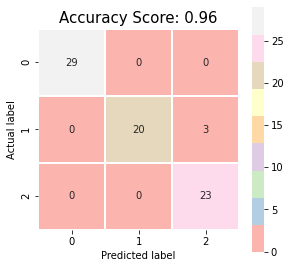

In [10]:
# Computing the confusion matrix

gnb_c_matrix = confusion_matrix(y_test, test_y_pred)

plt.figure(figsize=(4.5,4.5))
sns.heatmap(gnb_c_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

In [11]:
# Calculating the probabilities associated with test instances

gnb_clf.predict_proba(X_test[:10])

array([[1.00000000e+000, 9.61557332e-020, 5.34866299e-023],
       [1.00000000e+000, 9.07018600e-019, 2.46887826e-022],
       [1.00000000e+000, 5.78673006e-016, 7.89931955e-020],
       [1.00000000e+000, 2.30426387e-017, 1.89268416e-021],
       [1.00000000e+000, 2.35111912e-018, 1.33057651e-020],
       [2.63956449e-295, 6.35814342e-017, 1.00000000e+000],
       [8.13504889e-066, 9.99913715e-001, 8.62849574e-005],
       [1.00000000e+000, 4.14719870e-019, 2.41468874e-022],
       [3.96186457e-165, 2.55209029e-004, 9.99744791e-001],
       [2.83453419e-088, 9.57210759e-001, 4.27892405e-002]])